In [ ]:
from typing import Iterable, List
from numpy.linalg import norm
import matplotlib.pyplot as plt
import numpy as np
import abc

In [ ]:
import abc


class BaseLoss(abc.ABC):


    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:

        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:

        raise NotImplementedError

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:

        length = X.shape[0]
        y_pred = np.dot(X,w)

        loss = np.sum((y_pred-y)**2) / length
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:

        length = X.shape[0]
        y_pred = np.dot(X, w)
        error = y_pred - y
        grad = 2 * np.dot(X.T, error) / length
        return grad


In [ ]:
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)


# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      w = w - lr * loss.calc_grad(X,y,w)
      w_list.append(w.copy())
    return w_list

In [ ]:
np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

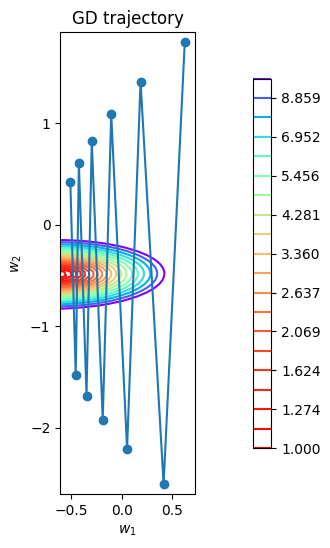

425.58917680450253
66.6518922998322


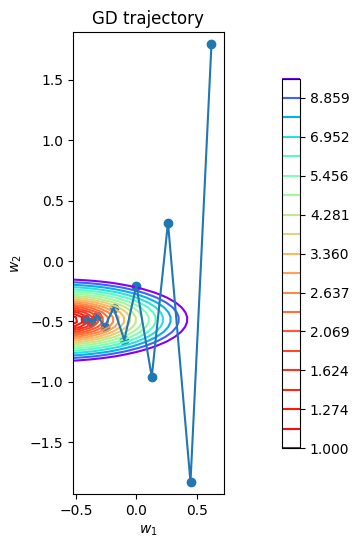

425.58917680450253
1.3434541778038


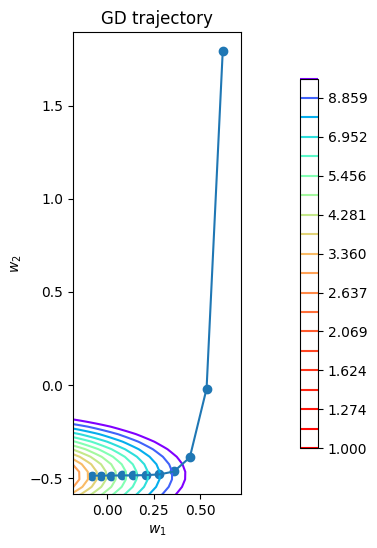

425.58917680450253
3.513979010127247


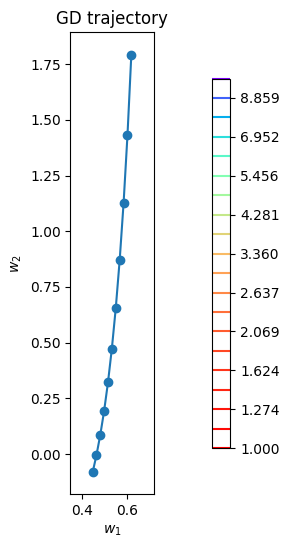

425.58917680450253
23.2792775081447


In [ ]:

loss = MSELoss()
lr = [0.012 , 0.01, 0.005, 0.001]
num_iter = 10
for i in lr:
  w_list = gradient_descent(w_init, X, y, loss, i, num_iter)
  plot_gd(w_list,X,y,loss)
  print(loss.calc_loss(X, y, w_list[0]))
  print(loss.calc_loss(X, y, w_list[-1]))

При достаточно высоких значениях lr, градиент начинает как бы мотать из стороны в сторону. Это может привести к тому что минимум не будет найден. При низком значении требуется больше итераций для поиска.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int,
) -> List[np.ndarray]:
  batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
  s = 1
  w = w_init.copy()
  w_list = [w.copy()]
  for i in range(n_iterations):
    step_size = lr * np.power(s / (s + i), p)
    w = w - step_size * loss.calc_grad(X[batch_indices],y[batch_indices],w)
    w_list.append(w.copy())
  return w_list




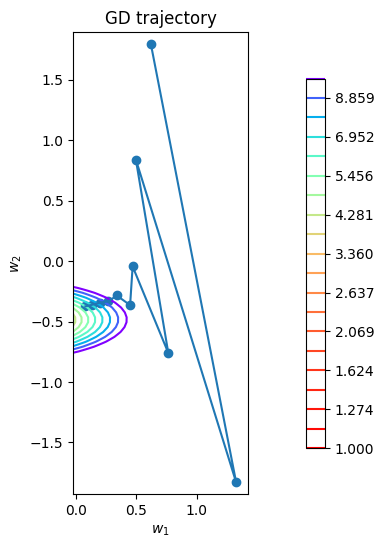

0.012 10


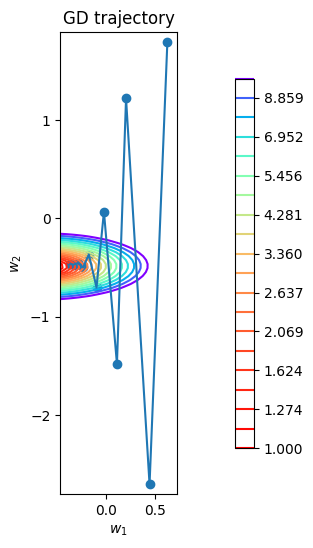

0.012 50


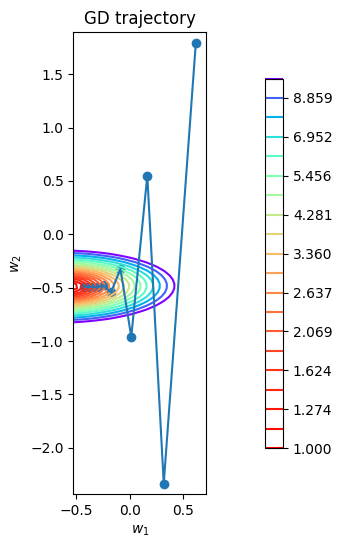

0.012 100


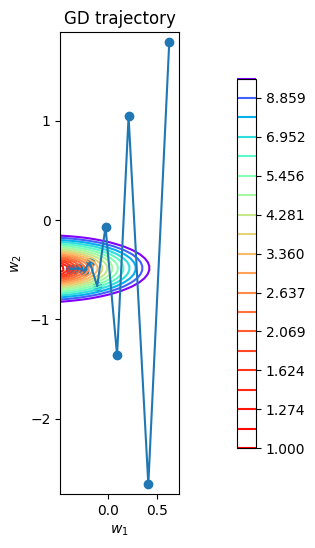

0.012 200


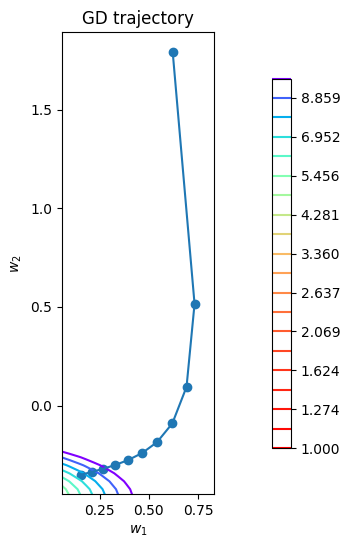

0.01 10


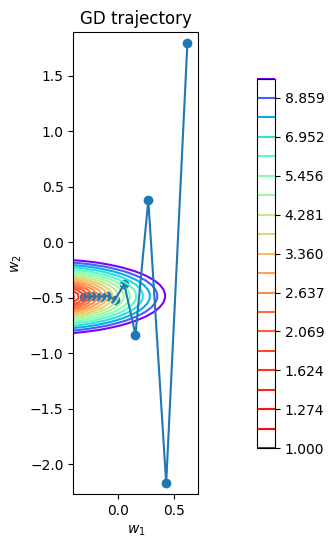

0.01 50


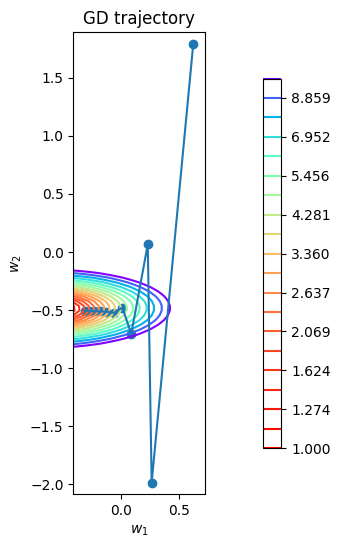

0.01 100


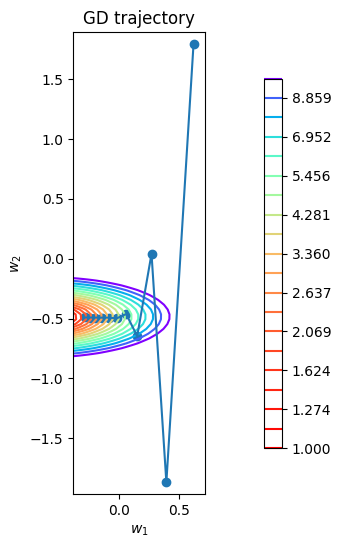

0.01 200


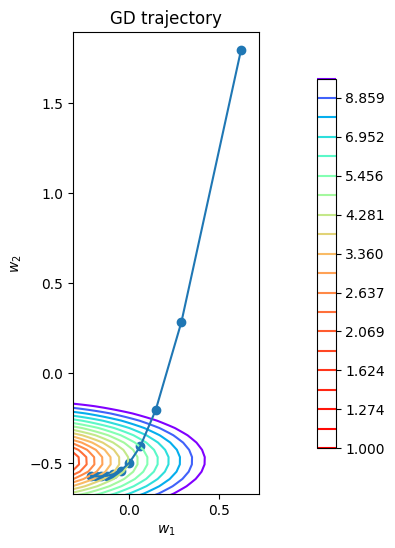

0.005 10


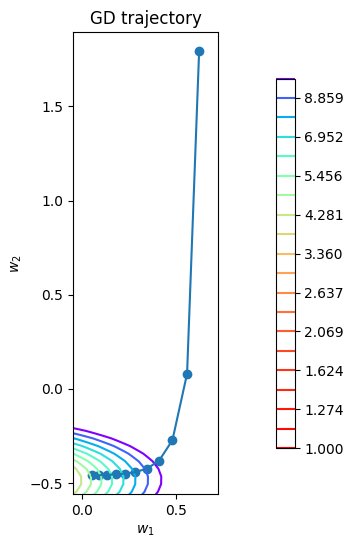

0.005 50


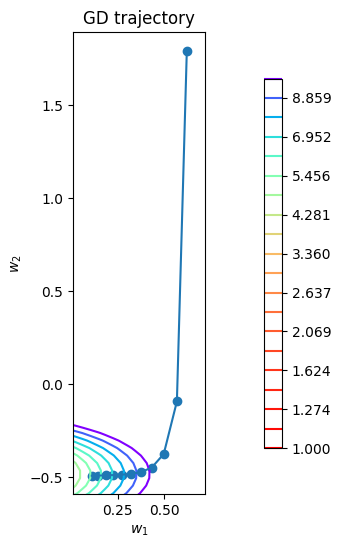

0.005 100


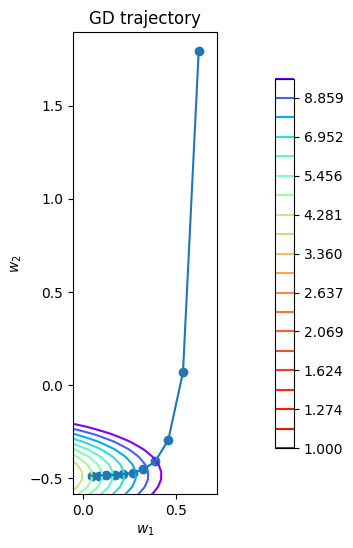

0.005 200


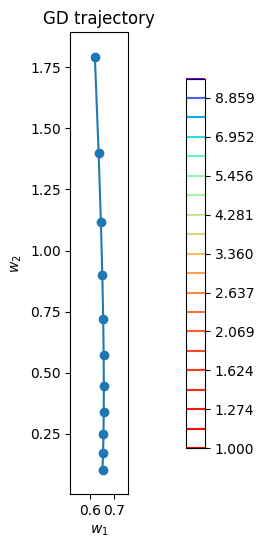

0.001 10


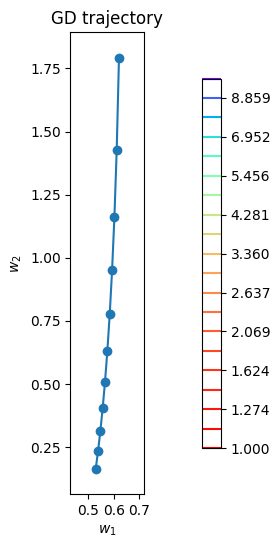

0.001 50


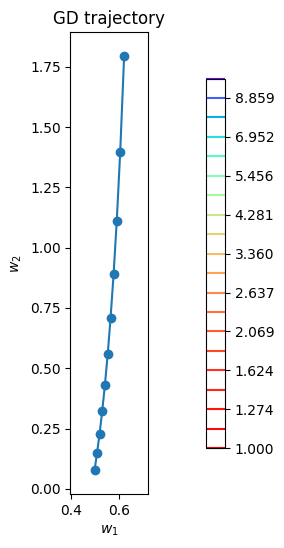

0.001 100


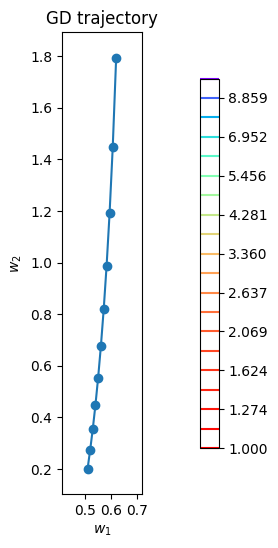

0.001 200


In [ ]:
loss = MSELoss()
lr = [0.012 , 0.01, 0.005, 0.001]
p = 0.2
num_iter = 10
batch_size = [10,50,100,200]
for i in lr:
  for j in batch_size:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, i, j, p, num_iter)
    plot_gd(w_list,X,y,loss)
    print(i,j)

Опять же при высоком значении lr график сильно мотает, но при уменьшении batch_size на этих же значениях lr, график уже не так сильно кидает из стороны в сторону. Тем не менее на слишком маленьких batch_size траектории достаточно неопределнные.

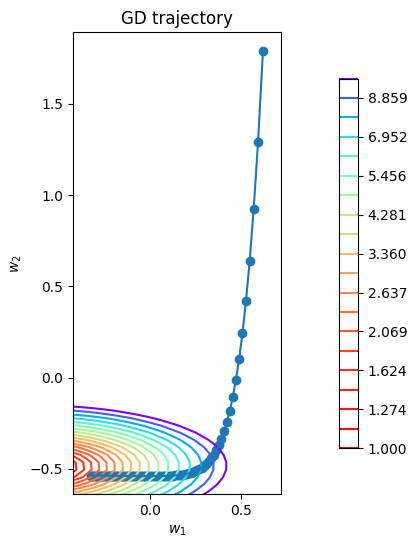

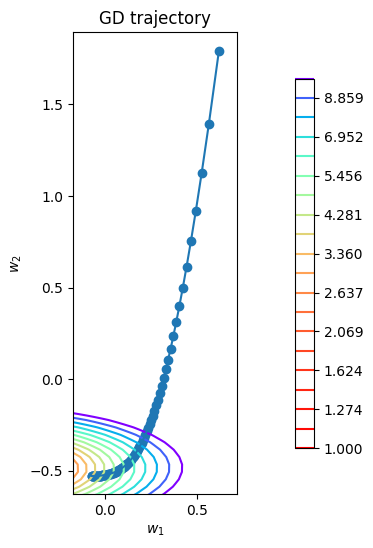

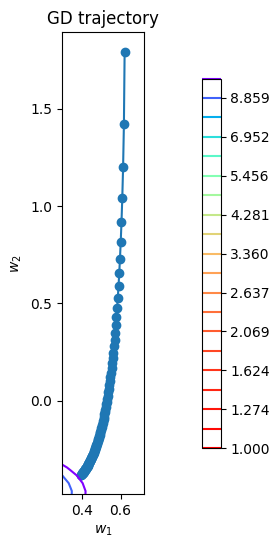

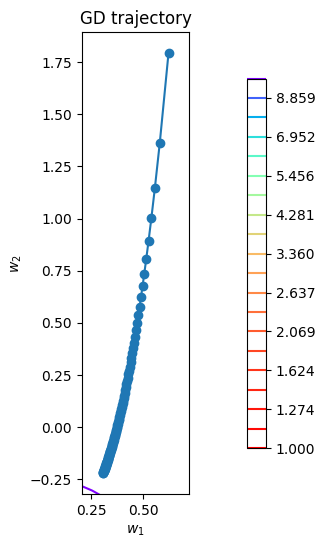

In [ ]:
loss = MSELoss()
lr = 0.001
p = [0.1 , 0.3, 0.5, 0.7]
num_iter = 100
batch_size = 10
for i in p:
  w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, i, num_iter)
  plot_gd(w_list,X,y,loss)

P сильно уменьшает шаг градиента при приближении к минимуму. На последних двух графиках видно, что точка минимума даже не достигнута из-за того, что шаг стал слишком небольшим. Параметр p также увеличивает количество шагов нужных для достижения минимума.

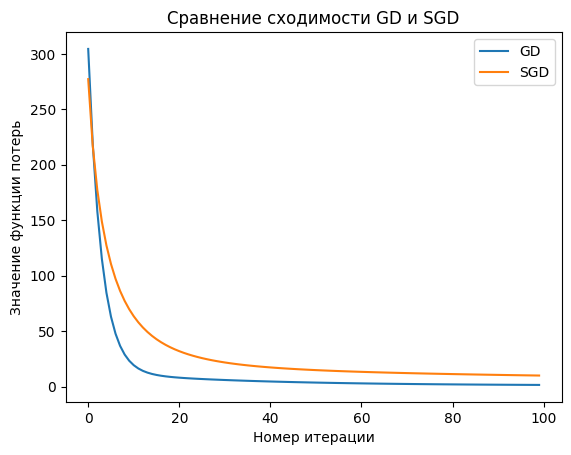

In [ ]:
p1 = 0.4

def stochastic_gradient_descent_losses(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int,
) -> List[np.ndarray]:
  batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
  s = 1
  w = w_init.copy()
  w_list = [w.copy()]
  losses = []
  for i in range(n_iterations):
    step_size = lr * np.power(s / (s + i), p)
    w = w - step_size * loss.calc_grad(X[batch_indices],y[batch_indices],w)
    w_list.append(w.copy())
    los = loss.calc_loss(X[batch_indices],y[batch_indices],w)
    losses.append(los)
  return losses
def gradient_descent_losses(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int,
) -> List[np.ndarray]:


    w = w_init.copy()
    w_list = [w.copy()]
    losses = []
    for i in range(n_iterations):
      w = w - lr * loss.calc_grad(X,y,w)
      w_list.append(w.copy())
      los = loss.calc_loss(X,y, w)
      losses.append(los)
    return losses

gd_losses = gradient_descent_losses(w_init, X, y, loss, lr, num_iter)
sgd_losses = stochastic_gradient_descent_losses(w_init, X, y, loss, lr, batch_size, p1, num_iter)

plt.figure()
plt.plot(range(len(gd_losses)), gd_losses, label='GD')
plt.plot(range(len(sgd_losses)), sgd_losses, label='SGD')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
plt.title('Сравнение сходимости GD и SGD')
plt.legend()
plt.show()

На графике видно что GD схожится гораздо быстрее к нулю чем SGD. При увелечении числа итераций SGD также сходится к нулю. Я думаю, это вызвано недостатком данных. На малых объемах данных эффективнее будет использовать GD из-за его быстроты и как бы простоты. При большом объемы данных эффективнее будет явно SGD.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":

        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.zeros(X.shape[1])

        for i in range(1000):
            gradient = self.loss.calc_grad(X, y, self.w)
            self.w = self.w - self.lr * gradient

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.asarray(X)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_pred = np.dot(X, self.w)
        return y_pred

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

X_raw = X_raw.drop("index", axis = 1)
X_real = X_raw.select_dtypes(exclude="object")
replacer = SimpleImputer(strategy = "median")
X_real_nomiss = pd.DataFrame(data = replacer.fit_transform(X_real), columns=X_real.columns
)
X_cat = X_raw.select_dtypes(include="object")
cat_replacer = SimpleImputer(strategy = "most_frequent")
X_cat_nomiss = pd.DataFrame(data = cat_replacer.fit_transform(X_cat), columns=X_cat.columns
)
X_no_mis = pd.concat([X_real_nomiss, X_cat_nomiss], axis=1)

X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
X_dum = pd.get_dummies(X_no_mis)
X_dum.head()

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
normalizer = MinMaxScaler()
X_dum = X_dum.rename(str,axis="columns")
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)
X.head()


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.0,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.261780,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

In [ ]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train,y_train)
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)



In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("MSE on train:", train_mse)
print("MSE on test:", test_mse)

MSE on train: 2529902.872542471
MSE on test: 4170217.83563499


In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """

        length = X.shape[0]
        y_pred = np.dot(X,w)


        loss = np.sum((y_pred-y)**2) / length + self.coef*np.sum(w[:-1]**2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        length = X.shape[0]
        y_pred = np.dot(X, w)
        error = y_pred - y
        w_new = np.copy(w)
        w_new[-1] = 0
        grad = 2 * np.dot(X.T, error) / length + 2*self.coef*w_new
        return grad
linear_regression_l2 = LinearRegression(MSEL2Loss(0.0000015))
linear_regression_l2.fit(X_train,y_train)
y_train_pred = linear_regression_l2.predict(X_train)
y_test_pred = linear_regression_l2.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE on train:", train_mse)
print("MSE on test:", test_mse)

MSE on train: 2530006.326425404
MSE on test: 4170157.0349900736


MSE на test'e упала немного (на 50).

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        length = X.shape[0]
        y_pred = np.dot(X, w)
        error = y_pred - y
        loss = 0
        for i in error:
          if abs(i) < self.eps:
            loss += 1/2 * i**2
          else:
            loss += self.eps * (abs(i) - 1/2 * self.eps)
        return loss / length
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        length = X.shape[0]
        y_pred = np.dot(X, w)
        error = y - y_pred
        grad = np.zeros(w.shape)
        for i, err in enumerate(error):
            if abs(err) < self.eps:
                grad -= err * X[i]
            else:
                grad -= self.eps * np.sign(err) * X[i]
        return grad

In [ ]:
linear_regression_huber = LinearRegression(HuberLoss(18))
linear_regression_huber.fit(X_train,y_train)
y_train_pred = linear_regression_huber.predict(X_train)
y_test_pred = linear_regression_huber.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("MSE on train:", train_mse)
print("MSE on test:", test_mse)

MSE on train: 4662580.660725983
MSE on test: 4668506.481460256


На HuberLoss ошибка только выросла, я подбирал разные значения eps, при более высоких ошибка сильно росла, при низких тоже.

Макаров Иван, 9 группа